# Analysis of the motion equations

Through newtonian analysis the motion equations are obtained for the system: 

 
$m_1L\ddot{\theta_1} = -m_1gsin\left ( \theta_1  \right ) - m_1L \ddot{x}cos\left ( \theta_1 \right ) -\nu_1L_1\dot{\theta_1 }$

$m_2L\ddot{\theta_2} = -m_2gsin\left ( \theta_2  \right ) - m_2L \ddot{x}cos\left ( \theta_2 \right ) -\nu_2L_2\dot{\theta_2 }$

$M\ddot{x}= -\gamma \dot{x}-m_1L\ddot{\theta_1}cos\left ( \theta_1 \right )+m_1L\dot{\theta_1}^2sin\left ( \theta_1 \right )-m_2L\ddot{\theta_2}cos\left ( \theta_2 \right )+m_2L\dot{\theta_2}^2sin\left ( \theta_2 \right )$

This set of differential equations is hard to solve because they are coupled and have non linear parts. For this reason, just small angles are considered. This assumption is plausible because the experiments do not use angles bigger the 20°. In this aproximmation  $sin\left ( \theta  \right )\approx \theta $ y $cos\left ( \theta  \right )\approx 1$. 

$m_1L\ddot{\theta_1} = -m_1g \theta_1 - m_1L \ddot{x} -\nu_1L_1\dot{\theta_1 }$

$m_2L\ddot{\theta_2} = -m_2g \theta_2  - m_2L \ddot{x} -\nu_2L_2\dot{\theta_2 }$

$M\ddot{x}= -\gamma \dot{x}-m_1L\ddot{\theta_1}+m_1L\dot{\theta_1}^2 \theta_1 -m_2L\ddot{\theta_2}+m_2L\dot{\theta_2}^2 \theta_2 $


Despite this system is easier to solve, it can not be solved directly with Python. First, it must be converted in a set of first order differential equations (normal form) as followed: 

$m_1L\dot{\phi_1} = -m_1g \theta_1 - m_1L \dot{\chi } -\nu_1L_1\phi_1$

$m_2L\dot{\phi_2} = -m_2g \theta_2  - m_2L \dot{\chi } -\nu_2L_2\phi_2$

$M\dot{\chi}= -\gamma \chi-m_1L\dot{\phi_1}+m_1L\phi_1^2 \theta_1 -m_2L\dot{\phi_2}+m_2L\phi_2^2 \theta_2$ 

$\phi_1 = \dot{\theta_1}$

$\phi_2 = \dot{\theta_2}$

$\chi = \dot{x}$

This system can be rearraged to be expressed in the form: $A\vec{x}+\vec{f} =\dot{ \vec{x}}$

$$
\begin{bmatrix}
0 &0  &0  &1  &0  &0 \\ 
0 & 0 &  0&  0& 1 & 0\\ 
 0& 0 & 0 & 0 & 0 & 1\\ 
\frac{-m_1g}{m_1L_1}-\mu m_1g& -\mu m_2g &0  &\frac{-\nu_1}{m_1L_1}-\mu\nu_1  &- \mu\nu_2 & \mu\gamma\\ 
-\mu m_1g  &\frac{-m_2g}{m_2L_2}-\mu m_2g  &0 & -\mu\nu_1  &\frac{-\nu_2}{m_2L_2}-\mu\nu_2& \mu\gamma\\ 
-\mu m_1g  & -\mu m_2g & 0 & -\mu\nu_1  &  \mu\nu_2 & -\mu\gamma\\
\end{bmatrix}

\begin{bmatrix}
\theta_1\\ 
\theta_2\\
x\\ 
\phi_1\\ 
\phi_2\\ 
\chi 
\end{bmatrix}
+
\begin{bmatrix}
0\\ 
0\\
0\\ 
-\mu m_1L_1\phi_1^2\theta_1-\mu m_2L_2\phi_2^2\theta_2\\ 
-\mu m_1L_1\phi_1^2\theta_1-\mu m_2L_2\phi_2^2\theta_2\\ 
\mu m_1L_1\phi_1^2\theta_1+\mu m_2L_2\phi_2^2\theta_2
\end{bmatrix}
=
\begin{bmatrix}
\dot{\theta_1}\\ 
\dot{\theta_2}\\
\dot{x}\\ 
\dot{\phi_1}\\ 
\dot{\phi_2}\\ 
\dot{\chi} 
\end{bmatrix}
$$
With $\mu = \frac{1}{M-m_1L_1-m_2L_2}$. The initial conditions are $\phi_1\left ( 0 \right ) =0, \phi_2\left ( 0 \right ) =0,\chi\left ( 0 \right ) =0, x\left ( 0 \right ) =0,\theta_1\left ( 0 \right ) = \theta_{1 0},\theta_2\left ( 0 \right ) = \theta_{20}$





In [259]:
#Solution with the normal form
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
def dSdt(t,S): 
    M = (104.6+103.7+284+954+879.4+49.1+49.1)/1000
    m1 = (104.6+49.1)/1000
    m2 = (103.7+49.1)/1000
    L1= 26.6/100
    L2=26.6/100
    nu1=0
    nu2=0
    g=9.8
    gamma = 0
    

    mu = 1/(M-(m1*L1)-(m2*L2))

    theta1,theta2,x,phi1,phi2,chi = S
    dtheta1_dt= phi1
    dtheta2_dt= phi2
    dx_dt=chi
    dchi_dt=-(mu*m1*g)*theta1-(mu*m2*g)*theta2-(mu*nu1*L1)*phi1-(mu*nu2*L2)*phi2-(mu*gamma)*chi
    dphi1_dt= -((m1*g*theta1)/(m1*L1))-((nu1*phi1*L1)/(m1*L1))-dchi_dt
    dphi2_dt= -((m2*g*theta2)/(m2*L2))-((nu2*phi2*L2)/(m2*L2))-dchi_dt

    return dtheta1_dt,dtheta2_dt,dx_dt,dphi1_dt,dphi2_dt,dchi_dt

#Initial conditions
def initialConditions(theta_1_0,theta_2_0, x_0,phi_1_0,phi_2_0,chi_0): 
    return (theta_1_0,theta_2_0,x_0,phi_1_0,phi_2_0,chi_0)

S_0 = initialConditions(0,0,0,0.4,0.1,0)

  

Solve the ODE

In [260]:
t = np.linspace(30,120,1000)
sol = odeint(dSdt,y0=S_0, t=t,tfirst=True)

Get the solution

In [261]:
theta1_sol = sol.T[0]
theta2_sol = sol.T[1]
x_sol = sol.T[2]
phi1_sol = sol.T[3]
phi2_sol = sol.T[4]
chi_sol = sol.T[5]

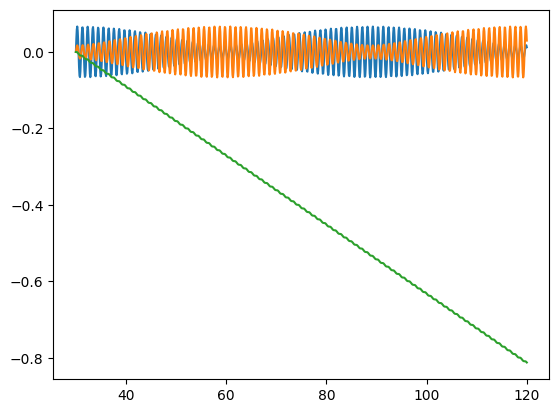

In [262]:
#Plot the solution
plt.plot(t,theta1_sol)
plt.plot(t,theta2_sol)
plt.plot(t,x_sol)


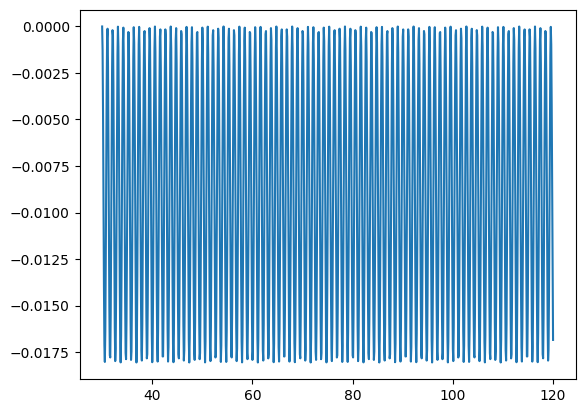

In [263]:

plt.plot(t,chi_sol)